## Import the dataset which I have shared on Wats App

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("E:/Mentor/Datasets/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
data1 = df.copy()

Data Cleaning and Pre-processing

In [6]:
### To check the duplicate rows - 
duplicate_rows = data1[data1.duplicated()]
print("Number of Duplicate rows : ",duplicate_rows.shape)

Number of Duplicate rows :  (1, 14)


In [7]:
#### We have to remove that duplicate rows:
data1 = data1.drop_duplicates()

In [8]:
#### Validating whether the duplicate row is dropped
duplicate_rows = data1[data1.duplicated()]
print("Number of Duplicate rows : ",duplicate_rows.shape)

Number of Duplicate rows :  (0, 14)


In [9]:
#### Checking for Null Values in the Dataset

In [12]:
print(data1.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [13]:
### Check for Outliers in the dataset

In [15]:
data1.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='age'>

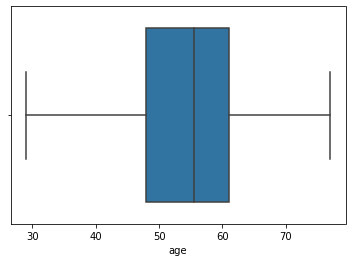

In [16]:
sns.boxplot(x = data1['age'])
#### No outlier in Age

<AxesSubplot:xlabel='sex'>

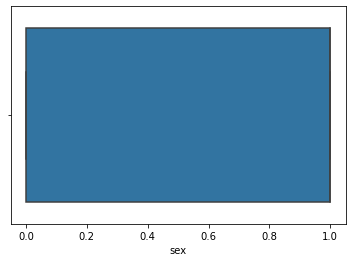

In [17]:
sns.boxplot(x = data1['sex'])
#### No outliers in Sex

<AxesSubplot:xlabel='cp'>

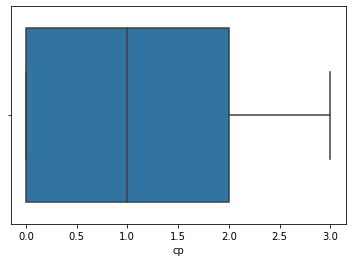

In [18]:
sns.boxplot(x = data1['cp'])
### No outlier in Cp

<AxesSubplot:xlabel='trtbps'>

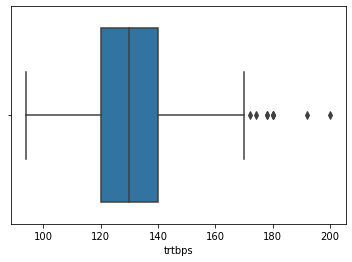

In [19]:
sns.boxplot(x = data1['trtbps'])
#### Outliers are observed on the Upper Threshold

<AxesSubplot:xlabel='chol'>

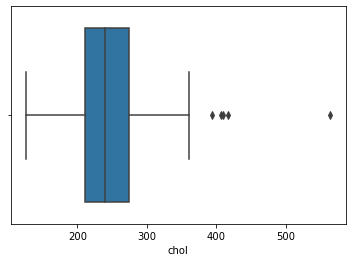

In [20]:
sns.boxplot(x = data1['chol'])
#### Outliers are observed on the Upper Threshold

<AxesSubplot:xlabel='fbs'>

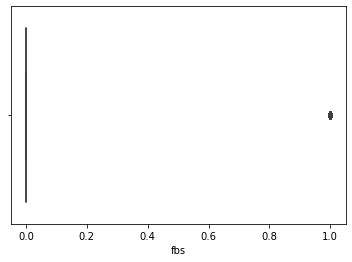

In [21]:
sns.boxplot(x = data1['fbs'])  ### Outlier as its categorical

<AxesSubplot:xlabel='restecg'>

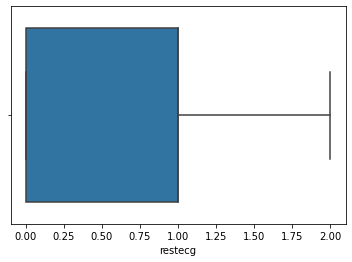

In [22]:
sns.boxplot(x = data1['restecg'])
### No outliers

<AxesSubplot:xlabel='thalachh'>

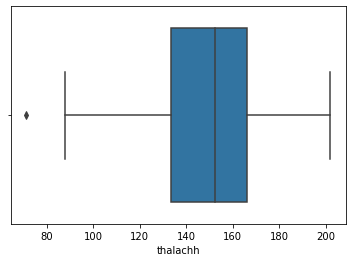

In [23]:
sns.boxplot(x = data1['thalachh'])
### outlier observed in the lower threshold

<AxesSubplot:xlabel='exng'>

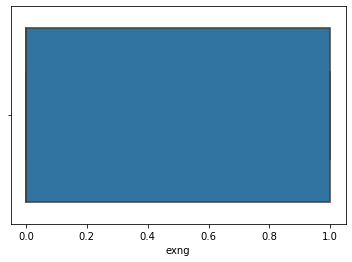

In [24]:
sns.boxplot(x = data1['exng'])
### No outlier

<AxesSubplot:xlabel='oldpeak'>

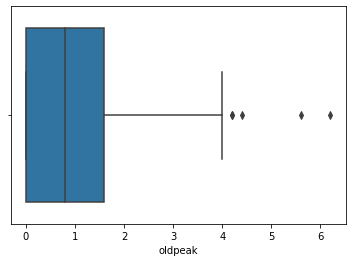

In [25]:
sns.boxplot(x = data1['oldpeak'])
### Outliers are observed in the Upper threshold

<AxesSubplot:xlabel='slp'>

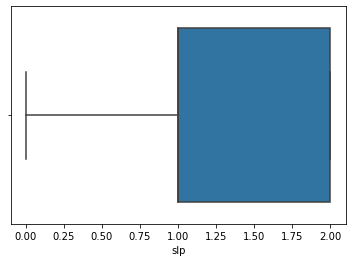

In [26]:
sns.boxplot(x = data1['slp'])  ### No outlier

<AxesSubplot:xlabel='caa'>

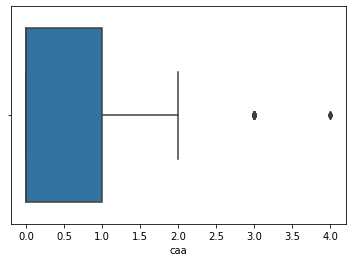

In [27]:
sns.boxplot(x = data1['caa'])  ### Outlier in Upper

<AxesSubplot:xlabel='thall'>

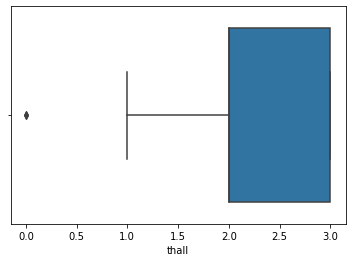

In [28]:
sns.boxplot(x = data1['thall'])  ### Outlier in Lower

In [36]:
data1.shape

(302, 14)

In [29]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


In [75]:
### Removing Outliers  using IQR

data2 = data1[~((data1 < (Q1 - 1.5*IQR)) | (data1 > (Q3 + 1.5*IQR))).any(axis = 1)]

data2.shape

sns.boxplot(x = data2['chol'])

2. Z - Scores

import numpy as np
from scipy import stats

z = np.abs(stats.zscore(data1))

print(z)

### if the z score is greater than 3, it states that the data 
###points are differ from the other data points and hence it is treated  as an outlier

data3 = data1[(z<3).all(axis = 1)]  ### Outlier imputing standard deviation

data3.shape

data3  ### As the Z-score is having more rows, we will move forward with this method

#### Correlations

corr = data3.corr()

import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True,cmap = "RdBu")

corr = data3.corr()['output']
corr

### highly Important Features
corr[np.abs(corr) > 0.4]

### if the variance is less than 1 or 1 then those features will not be able to make any impact on the models
data3.var()

### Model building and Planning
#### Domain - Doing this analysis for Medical



X = data3[['age','sex','cp','restecg','thalachh','exng','oldpeak','slp','caa','thall']]

X

y = data3['output']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3,random_state=1234)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Log = LogisticRegression()
Ds_tree = DecisionTreeClassifier(criterion='entropy')
Knn = KNeighborsClassifier(n_neighbors=5)
Rnd = RandomForestClassifier(criterion='entropy')

mod_train = Log.fit(X_train,y_train)
mod_train1 = Ds_tree.fit(X_train,y_train)
mod_train2 = Knn.fit(X_train,y_train)
mod_train3 = Rnd.fit(X_train,y_train)

mod_pred = mod_train.predict(X_test)
mod_pred1 = mod_train1.predict(X_test)
mod_pred2 = mod_train2.predict(X_test)
mod_pred3 = mod_train3.predict(X_test)

from sklearn.metrics import accuracy_score

print("The accuracy score for Logistic Regression : ",round(accuracy_score(mod_pred,y_test),2)*100,"%")
print("The accuracy score for Descion Tree : ",round(accuracy_score(mod_pred1,y_test),2)*100,"%")
print("The accuracy score for KNN : ",round(accuracy_score(mod_pred2,y_test),2)*100,"%")
print("The accuracy score for Random Forest : ",round(accuracy_score(mod_pred3,y_test),2)*100,"%")

The accuracy score for Logistic Regression :  79.0 %
The accuracy score for Descion Tree :  75.0 %
The accuracy score for KNN :  62.0 %
The accuracy score for Random Forest :  77.0 %


In [89]:
data5 = pd.DataFrame({'Actual Output': y_test,'Logistic Regression Prediction': mod_pred,'Descion Tree':mod_pred1,'KNN': mod_pred2,'Random Forest':mod_pred3})

d = {0:'less chance of heart attack - 0',1:'More chance of heart attack - 1'}

data5['Actual Output'] = data5['Actual Output'].map(d)

In [90]:
### Column Normalization
#### ParameterTuning
#### Scaling
#### Z-score, Quantile mentod(Check)

In [91]:
data5

,Actual Output,Logistic Regression Prediction,Descion Tree,KNN,Random Forest
294,less chance of heart attack - 0,0,1,0,1
112,More chance of heart attack - 1,1,0,0,1
301,less chance of heart attack - 0,0,0,0,0
68,More chance of heart attack - 1,1,1,1,1
101,More chance of heart attack - 1,0,1,0,0
...,...,...,...,...,...
142,More chance of heart attack - 1,1,1,1,1
106,More chance of heart attack - 1,1,0,0,0
157,More chance of heart attack - 1,1,1,1,1
252,less chance of heart attack - 0,0,0,0,1
